In [15]:
import pandas as pd
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary


In [43]:
# !pip install torch
# !pip install pyLDAvis
# !pip install ipywidgets
# !pip install transformers
!pip install lda2vec



  Using cached lda2vec-0.16.10.tar.gz (13 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14411 sha256=942ed1b63206e08a6c0aa2afdf5df30d7d03ff690d2f2351b08ddbaee4ec7fec
  Stored in directory: c:\users\chewr\appdata\local\pip\cache\wheels\82\8a\3e\5707f2e4b14ed7425585ed9b95b94219d1b49554985a6e1b5b
Successfully built lda2vec


In [9]:
# Define the path to the pickle file
pickle_file = 'processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    df = pickle.load(file)

In [16]:
# Define the path to the pickle file
pickle_file = 'test_processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    test_data = pickle.load(file)

In [10]:
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,TITLE_len,ABSTRACT_len,title,abstract
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,4,265,"[reconstruct, effect, map]","[predictive, model, allow, inference, analyze,..."
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,4,76,"[rotation, invariance, neural, network]","[rotation, invariance, translation, invariance..."
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,8,99,"[spherical, polyharmonics, poisson, kernels, p...","[introduce, develop, notion, spherical, polyha..."
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,9,110,"[finite, element, approximation, stochastic, m...","[stochastic, landau, lifshitz, gilbert, llg, e..."
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,20,125,"[comparative, study, discrete, wavelet, transf...","[ftir, spectra, sample, 7, plant, species, use..."


In [11]:
df2 = df[['title', 'abstract']]  # Select the 'TITLE' and 'ABSTRACT' columns
df2.head()

,title,abstract
0,"[reconstruct, effect, map]","[predictive, model, allow, inference, analyze,..."
1,"[rotation, invariance, neural, network]","[rotation, invariance, translation, invariance..."
2,"[spherical, polyharmonics, poisson, kernels, p...","[introduce, develop, notion, spherical, polyha..."
3,"[finite, element, approximation, stochastic, m...","[stochastic, landau, lifshitz, gilbert, llg, e..."
4,"[comparative, study, discrete, wavelet, transf...","[ftir, spectra, sample, 7, plant, species, use..."


In [20]:
from gensim.corpora import Dictionary


# Convert the text column to a list of lists of tokens
documents = df2['abstract'].tolist()

# Create a dictionary and bag-of-words corpus using Gensim
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]


In [22]:
abstract = df2['abstract']

In [24]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import numpy as np

# Assuming 'corpus' and 'dictionary' contain the bag-of-words corpus and dictionary created from your preprocessed data

# Calculate coherence scores for different numbers of topics
min_topics = 3
max_topics = 5
coherence_values = []

for num_topics in range(min_topics, max_topics + 1):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=abstract, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

# Find the optimal number of topics that maximizes coherence
optimal_num_topics = np.argmax(coherence_values) + min_topics

print(f"Optimal number of topics: {optimal_num_topics}")
print(f"Coherence scores: {coherence_values}")


Optimal number of topics: 5
Coherence scores: [0.4103152704991449, 0.4328148338474421, 0.4437382937116337]


In [25]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import numpy as np

# Assuming 'corpus' and 'dictionary' contain the bag-of-words corpus and dictionary created from your preprocessed data

# Calculate coherence scores for different numbers of topics
min_topics = 6
max_topics = 8
coherence_values = []

for num_topics in range(min_topics, max_topics + 1):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=abstract, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

# Find the optimal number of topics that maximizes coherence
optimal_num_topics = np.argmax(coherence_values) + min_topics

print(f"Optimal number of topics: {optimal_num_topics}")
print(f"Coherence scores: {coherence_values}")


Optimal number of topics: 8
Coherence scores: [0.4555079680166545, 0.4566743086775357, 0.4695732569001521]


In [26]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import numpy as np

# Assuming 'corpus' and 'dictionary' contain the bag-of-words corpus and dictionary created from your preprocessed data

# Calculate coherence scores for different numbers of topics
min_topics = 9
max_topics = 10
coherence_values = []

for num_topics in range(min_topics, max_topics + 1):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=abstract, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

# Find the optimal number of topics that maximizes coherence
optimal_num_topics = np.argmax(coherence_values) + min_topics

print(f"Optimal number of topics: {optimal_num_topics}")
print(f"Coherence scores: {coherence_values}")


Optimal number of topics: 10
Coherence scores: [0.45408725908959024, 0.46068368581563063]


In [27]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import numpy as np

# Assuming 'corpus' and 'dictionary' contain the bag-of-words corpus and dictionary created from your preprocessed data

# Calculate coherence scores for different numbers of topics
min_topics = 11
max_topics = 12
coherence_values = []

for num_topics in range(min_topics, max_topics + 1):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=abstract, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

# Find the optimal number of topics that maximizes coherence
optimal_num_topics = np.argmax(coherence_values) + min_topics

print(f"Optimal number of topics: {optimal_num_topics}")
print(f"Coherence scores: {coherence_values}")


Optimal number of topics: 11
Coherence scores: [0.4637378701744679, 0.4552119754263819]


In [28]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Assuming 'corpus' and 'dictionary' contain the bag-of-words corpus and dictionary created from your preprocessed data

# Define the optimal number of topics
num_topics = 8

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.027*"model" + 0.019*"data" + 0.014*"use" + 0.011*"sample" + 0.010*"method" + 0.009*"propose" + 0.007*"methods" + 0.007*"distribution" + 0.007*"estimate" + 0.007*"test"

Topic: 1 
Words: 0.015*"problem" + 0.012*"function" + 0.011*"graph" + 0.010*"result" + 0.010*"show" + 0.008*"algorithm" + 0.007*"time" + 0.007*"paper" + 0.007*"case" + 0.006*"consider"

Topic: 2 
Words: 0.031*"network" + 0.023*"model" + 0.009*"use" + 0.008*"data" + 0.007*"study" + 0.006*"information" + 0.006*"neural" + 0.005*"different" + 0.005*"social" + 0.005*"result"

Topic: 3 
Words: 0.016*"n" + 0.015*"group" + 0.013*"g" + 0.013*"x" + 0.012*"k" + 0.011*"space" + 0.010*"give" + 0.010*"p" + 0.010*"show" + 0.009*"f"

Topic: 4 
Words: 0.010*"state" + 0.009*"phase" + 0.009*"field" + 0.008*"model" + 0.007*"magnetic" + 0.007*"quantum" + 0.006*"show" + 0.006*"energy" + 0.006*"transition" + 0.006*"use"

Topic: 5 
Words: 0.025*"learn" + 0.016*"propose" + 0.013*"use" + 0.012*"train" + 0.011*"image" + 0.010*"

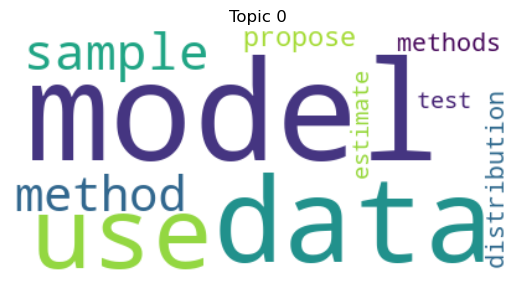

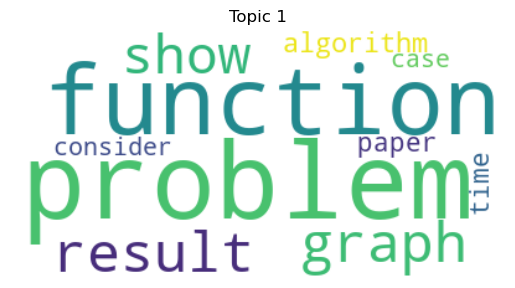

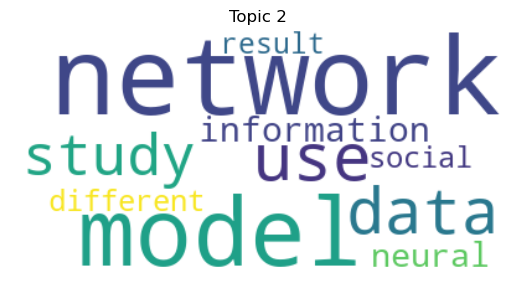

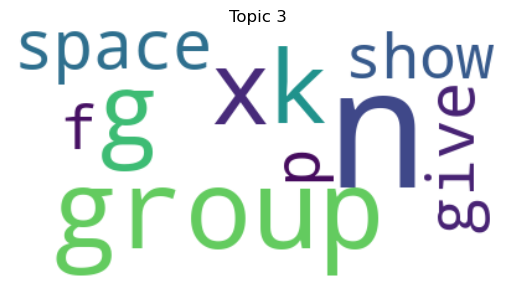

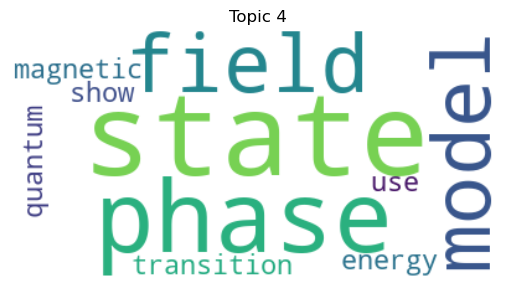

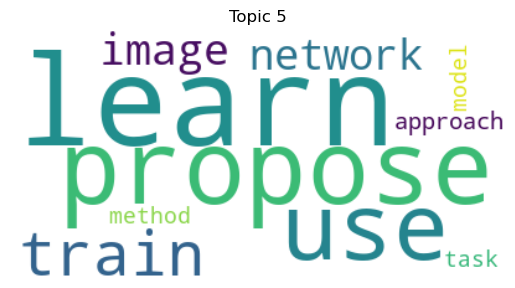

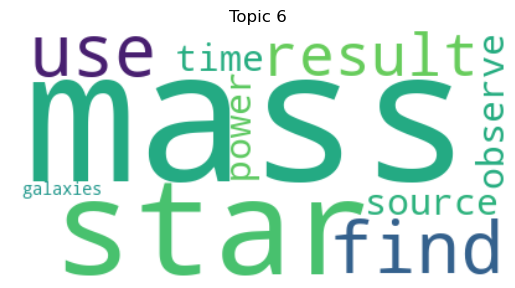

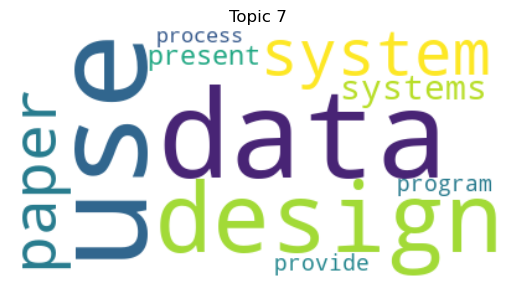

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each topic
for idx, topic in lda_model.show_topics(formatted=False):
    word_freq = {word: freq for word, freq in topic}
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    
    # Plot word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {idx}')
    plt.axis('off')
    plt.show()


In [33]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics using PyLDAvis
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; 

In [45]:
from gensim.models import HdpModel

# Train HDP model
hdp_model = HdpModel(corpus, dictionary)

# Print topics
for topic_id, topic in hdp_model.show_topics():
    print(f"Topic {topic_id}: {topic}")


Topic 0: 0.010*model + 0.009*use + 0.006*show + 0.006*data + 0.006*result + 0.005*network + 0.004*propose + 0.004*study + 0.004*paper + 0.004*approach + 0.004*learn + 0.004*also + 0.003*method + 0.003*time + 0.003*base + 0.003*present + 0.003*two + 0.003*system + 0.003*provide + 0.003*find
Topic 1: 0.011*model + 0.010*use + 0.007*data + 0.007*network + 0.006*learn + 0.006*show + 0.006*propose + 0.006*result + 0.005*approach + 0.004*paper + 0.004*method + 0.004*problem + 0.004*base + 0.004*algorithm + 0.003*also + 0.003*function + 0.003*study + 0.003*provide + 0.003*methods + 0.003*present
Topic 2: 0.007*use + 0.007*model + 0.007*show + 0.006*result + 0.005*study + 0.004*paper + 0.004*also + 0.004*function + 0.004*give + 0.004*data + 0.004*problem + 0.004*n + 0.003*network + 0.003*two + 0.003*set + 0.003*time + 0.003*propose + 0.003*space + 0.003*k + 0.003*number
Topic 3: 0.008*model + 0.008*use + 0.005*show + 0.005*result + 0.005*data + 0.004*propose + 0.004*network + 0.003*paper + 0.0

In [48]:
topic_distribution = []
for doc in corpus:
    doc_topics = lda_model.get_document_topics(doc)
    topic_distribution.append([topic[1] for topic in doc_topics])
print(topic_distribution)

[[0.2928489, 0.3220731, 0.03686684, 0.31740922, 0.028575756], [0.21941829, 0.052382883, 0.71458155], [0.54708785, 0.42396826, 0.017281674], [0.7186696, 0.1987002, 0.072659664], [0.39508435, 0.057755534, 0.11334766, 0.3835968, 0.045532737], [0.74361145, 0.14660822, 0.046029508, 0.023695672, 0.034687832], [0.1096391, 0.03607776, 0.1786993, 0.6668829], [0.77104354, 0.11069693, 0.10904316], [0.67610663, 0.3115732], [0.084417805, 0.622041, 0.102411754, 0.09284001, 0.093762875], [0.18706638, 0.030713674, 0.48002517, 0.16941154, 0.13023853], [0.108044714, 0.35118574, 0.4335599, 0.084297806, 0.019643262], [0.6327385, 0.31491262, 0.044321265], [0.7459607, 0.24386406], [0.028091127, 0.86423993, 0.099835575], [0.19440156, 0.069020495, 0.71339303], [0.015463186, 0.048960697, 0.9316624], [0.13494073, 0.83914566], [0.47088233, 0.18859583, 0.2903399, 0.046191685], [0.054025937, 0.6102314, 0.21432649, 0.067044415, 0.051949892], [0.046288107, 0.24176869, 0.09190473, 0.2610482, 0.35609862], [0.3080318, 

In [49]:
document_summaries = []
for doc in corpus:
    doc_topics = lda_model.get_document_topics(doc)
    top_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)[:3]  # Get top 3 topics
    summary = " ".join([word[0] for topic, _ in top_topics for word in lda_model.show_topic(topic)])
    document_summaries.append(summary)


C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\chewr\anaconda3\envs\nlp\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\chewr\anaconda3\envs\nlp\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices